In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data Extraction

In [6]:
#UK Population
uk_population_df = pd.read_csv('gdrive/My Drive/dataset/uk_population1.csv')
uk_population_df.style.background_gradient(cmap='Reds')
uk_population_df.columns

Index(['Code', 'Name', 'Geography', 'Area (sq km)', 'Estd. Population ',
       'people per sq. km'],
      dtype='object')

In [8]:
#UK Population and age
uk_population_density_df = pd.read_csv('gdrive/My Drive/dataset/uk_population_age_persq.csv')
uk_population_density_df.columns

Index(['Area code', 'Area name', 'median age', 'population density',
       'population density deciles', 'Age 0-15%', 'Age 65+%', 'Age 85+%',
       'Working age (16-64%)', 'Old Age Dependency Ratio (OADR)',
       'Dependency Ratio', 'Unnamed: 11'],
      dtype='object')

In [9]:
#UK Population density
uk_population_density_df = uk_population_density_df.drop(['Area code','population density deciles', 'Age 0-15%', 'Age 85+%', 'Working age (16-64%)', 'Old Age Dependency Ratio (OADR)', 'Dependency Ratio', 'Unnamed: 11'], axis=1)
uk_population_density_df.columns

Index(['Area name', 'median age', 'population density', 'Age 65+%'], dtype='object')

In [10]:
#UK Population by Ethnicity

uk_ethnicity_df = pd.read_csv('gdrive/My Drive/dataset/uk_ethnic_population.csv')
uk_ethnicity_df = uk_ethnicity_df.drop(['Grand Total'], axis=1)
uk_ethnicity_df.columns

Index(['Area name', 'Asian', 'Black', 'Mixed', 'Other', 'White'], dtype='object')

In [11]:
#UK Internal Migration Data

uk_mobilityTrend_df = pd.read_csv('gdrive/My Drive/dataset/internal_migration_inflow.csv')
uk_mobilityTrend_df = uk_mobilityTrend_df.drop(['Net', 'Area code'], axis=1)
uk_mobilityTrend_df.columns

Index(['Area name', 'Inflow', 'Outflow'], dtype='object')

In [12]:
#only run this cell if live data not available. 
#This will bring data from last stored csv file on 21/09/2020

cases_df = pd.read_csv('gdrive/My Drive/dataset/uk_cases.csv')

In [13]:
cases_df.columns

Index(['date', 'areaName', 'areaCode', 'newCasesByPublishDate',
       'cumCasesByPublishDate', 'newDeathsByDeathDate',
       'cumDeathsByDeathDate'],
      dtype='object')

# Latest News {{ timestamp }}

In [15]:
latest_cases_df = cases_df.copy().drop(['date','areaName', 'areaCode'], axis=1)
latest_cases_df = latest_cases_df[:1]
latest_cases_df.rename(columns={"newCasesByPublishDate" : "New Cases", "cumCasesByPublishDate": "Total Cases", "newDeathsByDeathDate": "New Deaths", "cumDeathsByDeathDate": "Total Deaths"}).style.set_properties(**{'font-size': '20pt'}).background_gradient(cmap='Reds')


,New Cases,Total Cases,New Deaths,Total Deaths
0,4926,403551.000000,37,41825.000000


# Total Cases in United Kingdom with Time Series

In [16]:
cases_df = cases_df.copy().drop(['areaName', 'areaCode'], axis=1)

In [17]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=cases_df['date'], y = cases_df['cumCasesByPublishDate'], mode='lines+markers', name='Total Cases'))
fig.update_layout(title_text='Total Coronovirus Confirmed Cases in United Kingdom', yaxis_title='Confirmed Cases', xaxis_tickangle = 315)
fig.show()

# Weekly Cases in United Kingdom with Time Series

In [18]:
weekly_cases_df = cases_df.sort_values('date')
weekly_cases_df = weekly_cases_df.reset_index(drop=True)
weekly_cases_df.reset_index(drop=True)
weekly_cases_df = weekly_cases_df.iloc[28::, :]
weekly_cases_df['date'] = pd.to_datetime(weekly_cases_df['date'])
weekly_cases_df = weekly_cases_df.drop(['cumCasesByPublishDate', 'cumDeathsByDeathDate'], axis=1)
#idx = (["Week "+str(i+1) for i in range(33)]) 
#weekly_cases_df.index = idx

In [19]:

weekly_cases_df = weekly_cases_df.resample('W-Fri', on='date').sum()
weekly_cases_df.columns = ['weekly_cases_added', 'weekly_deaths_added']
idx = (["Week "+str(i) for i in range(35)]) 
#weekly_cases_df.index = idx
#df.insert(loc=idx, column='A', value=new_col)
weekly_cases_df.insert(0,column='week',value=idx)



In [20]:
weekly_cases_df

,week,weekly_cases_added,weekly_deaths_added
date,,,
2020-01-31,Week 0,2,0
2020-02-07,Week 1,1,0
2020-02-14,Week 2,6,0
2020-02-21,Week 3,0,0
2020-02-28,Week 4,10,0
2020-03-06,Week 5,141,1
2020-03-13,Week 6,637,9
2020-03-20,Week 7,3186,181
2020-03-27,Week 8,10565,978


In [21]:
#plot weekly graph

fig = go.Figure(data=[
    go.Bar(name='Weekly Added Cases', x=weekly_cases_df['week'], y=weekly_cases_df['weekly_cases_added']),
    go.Bar(name='Weekly Added Deaths', x=weekly_cases_df['week'], y=weekly_cases_df['weekly_deaths_added'])
])
# Change the bar mode
fig.update_layout(title_text='Weekly Coronovirus Confirmed Cases & Deaths in the UK', yaxis_title='Weekly Confirmed Cases & Deaths', barmode='group')
fig.show()

# Daily Cases in United Kingdom with Time Series

In [22]:
#plot daily graph

fig = px.bar(cases_df, x='date', y='newCasesByPublishDate', barmode='group', height=400)
fig.update_layout(title_text='Daily Coronovirus Confirmed Cases in United Kingdom', yaxis_title='Daily Confirmed Cases', xaxis_tickangle = 315, plot_bgcolor='rgb(230,230,230)')
fig.show()

In [23]:
#plot line graph with time series for cumulative deatsh and cases

fig = go.Figure()
fig.add_trace(go.Scatter(x=cases_df['date'], y=cases_df['cumCasesByPublishDate'], mode='lines+markers', name='total_cases',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=cases_df['date'], y=cases_df['cumDeathsByDeathDate'], mode='lines+markers', name='total_Deaths', line=dict(color='Red', width=2)))
fig.update_layout(title='United Kingdom COVID-19 Cases and Deaths', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'), xaxis=dict(title='Time'))
fig.show()

# Cumulative Region-wise cases

In [24]:
#only run this cell if live data not available. 
#This will bring data from last stored csv file on 21/09/2020

region_wise_cases_df = pd.read_csv(r'gdrive/My Drive/dataset/region_wise_cases.csv')
region_wise_cases_df.columns

Index(['date', 'areaName', 'areaCode', 'newCasesBySpecimenDate',
       'cumCasesBySpecimenDate', 'newDeathsByDeathDate',
       'cumDeathsByDeathDate', 'cumCasesBySpecimenDateRate'],
      dtype='object')

In [27]:
#region wise data cleaning

cumRegionWiseCases_df = region_wise_cases_df.replace(np.nan,0)
cumRegionWiseCases_df = cumRegionWiseCases_df.copy().drop(['date','areaCode','newCasesBySpecimenDate', 'cumDeathsByDeathDate','newDeathsByDeathDate'], axis=1)
cumRegionWiseCases_df.style.background_gradient(cmap='Reds')


,areaName,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate
0,East Midlands,30580,632.400000
1,East of England,29422,471.800000
2,London,45749,510.500000
3,North East,21293,797.500000
4,North West,70831,964.800000
5,South East,41274,449.600000
6,South West,16648,296.000000
7,West Midlands,38077,641.700000
8,Yorkshire and The Humber,44147,802.200000


In [28]:
total_cases = cumRegionWiseCases_df['cumCasesBySpecimenDate'].sum()
total_cases

338021

In [31]:
#plot bar graph of region wise cumulative cases

fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=cumRegionWiseCases_df['areaName'], y= cumRegionWiseCases_df['cumCasesBySpecimenDateRate']),
    
])
# Change the bar mode
fig.update_layout(title='Number of Confirmed cases in UK (Region-Wise)', barmode='group')
fig.show()

In [32]:
#plot bar graph of region wise cumulative cases

def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

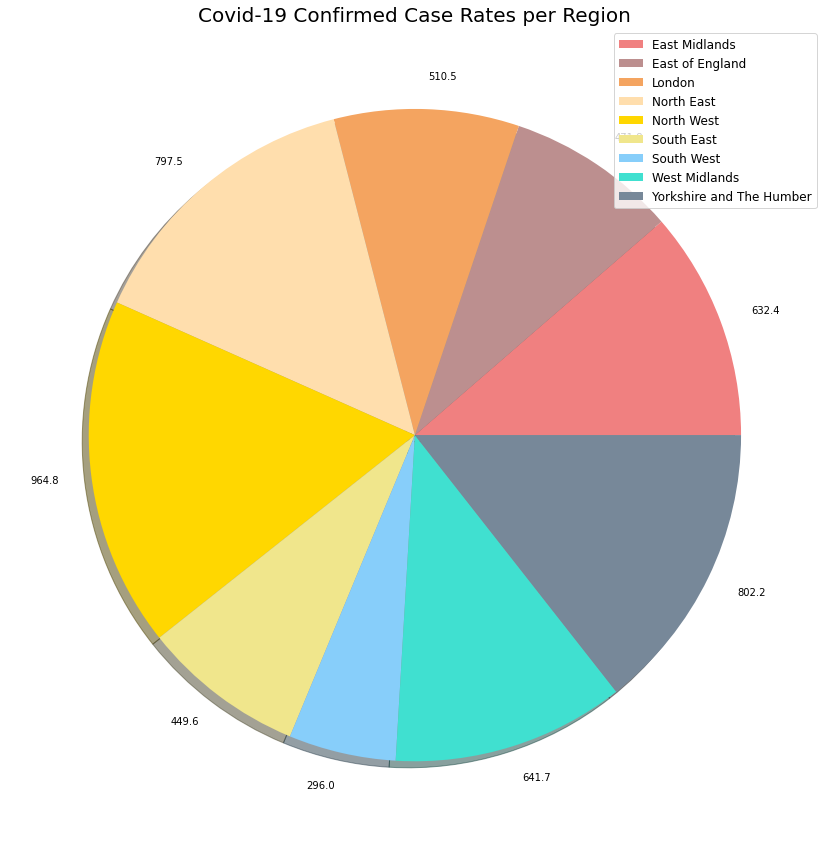

In [33]:
plot_pie_charts(cumRegionWiseCases_df['areaName'], cumRegionWiseCases_df['cumCasesBySpecimenDateRate'], 'Covid-19 Confirmed Case Rates per Region')

# Cumulative Cases and Deaths Nation-wise

In [36]:
#only run this cell if live data not available. 
#This will bring data from last stored csv file on 21/09/2020

nation_wise_cases_df = pd.read_csv('gdrive/My Drive/dataset/nation_wise_cases.csv')

In [37]:
nation_wise_cases_df.columns

Index(['date', 'areaName', 'areaCode', 'newCasesByPublishDate',
       'cumCasesByPublishDate', 'newDeathsByDeathDate',
       'cumDeathsByDeathDate'],
      dtype='object')

In [38]:
#nation wise data cleaning

cumNationWiseCases_df = nation_wise_cases_df.replace(np.nan,0)
cumNationWiseCases_df = cumNationWiseCases_df.copy().drop(['date','areaCode','newCasesByPublishDate', 'newDeathsByDeathDate'], axis=1)
cumNationWiseCases_df.style.background_gradient(cmap='Reds')

,areaName,cumCasesByPublishDate,cumDeathsByDeathDate
0,England,347842,37139
1,Northern Ireland,9541,577
2,Scotland,25009,2506
3,Wales,21159,1603


In [39]:
#cumulative cases for each country
england_cumCases = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="England", 'cumCasesByPublishDate'].values[0]
scotland_cumCases = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="Scotland", 'cumCasesByPublishDate'].values[0]
wales_cumCases = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="Wales", 'cumCasesByPublishDate'].values[0]
nIreland_cumCases = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="Northern Ireland", 'cumCasesByPublishDate'].values[0]

#nation-wise population
england_population = uk_population_df.loc[uk_population_df['Name']=="ENGLAND", 'Estd. Population '].values[0]
scotland_population = uk_population_df.loc[uk_population_df['Name']=="SCOTLAND", 'Estd. Population '].values[0]
wales_population = uk_population_df.loc[uk_population_df['Name']=="WALES", 'Estd. Population '].values[0]
nIreland_population = uk_population_df.loc[uk_population_df['Name']=="NORTHERN IRELAND", 'Estd. Population '].values[0]

# calculation of case rates per 100,000 population for infection
england_caseRate = "{:.2f}".format(england_cumCases / england_population * 100000)
scotland_caseRate = "{:.2f}".format(scotland_cumCases / scotland_population * 100000)
wales_caseRate = "{:.2f}".format(wales_cumCases / wales_population * 100000)
nIreland_caseRate = "{:.2f}".format(nIreland_cumCases / nIreland_population * 100000)
CumCaseRate = [england_caseRate, nIreland_caseRate, scotland_caseRate, wales_caseRate]

#cumulative deaths for each country
england_cumDeaths = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="England", 'cumDeathsByDeathDate'].values[0]
scotland_cumDeaths = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="Scotland", 'cumDeathsByDeathDate'].values[0]
wales_cumDeaths = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="Wales", 'cumDeathsByDeathDate'].values[0]
nIreland_cumDeaths = cumNationWiseCases_df.loc[cumNationWiseCases_df.areaName=="Northern Ireland", 'cumDeathsByDeathDate'].values[0]

# calculation of death rates per 100,000 population for infection
england_deathRate = "{:.2f}".format(england_cumDeaths / england_population * 100000)
scotland_deathRate = "{:.2f}".format(scotland_cumDeaths / scotland_population * 100000)
wales_deathRate = "{:.2f}".format(wales_cumDeaths / wales_population * 100000)
nIreland_deathRate = "{:.2f}".format(nIreland_cumDeaths / nIreland_population * 100000)

#add a new columns of cumCaseRate and cumDeathRate to the cumNationWiseCases_df table
CumCaseRate = [england_caseRate, nIreland_caseRate, scotland_caseRate, wales_caseRate]
CumDeathRate = [england_deathRate, nIreland_deathRate, scotland_deathRate, wales_deathRate]

cumNationWiseCases_df['cumCaseRate'] = CumCaseRate
cumNationWiseCases_df['cumDeathRate'] = CumDeathRate

cumNationWiseCases_df


,areaName,cumCasesByPublishDate,cumDeathsByDeathDate,cumCaseRate,cumDeathRate
0,England,347842,37139,617.98,65.98
1,Northern Ireland,9541,577,503.84,30.47
2,Scotland,25009,2506,457.76,45.87
3,Wales,21159,1603,671.10,50.84


In [40]:
#plotting bar graph for cumulative case rate and death rate for all 4 nations

fig = go.Figure(data=[
    go.Bar(name='Total Case Rate', x=cumNationWiseCases_df['areaName'], y=cumNationWiseCases_df['cumCaseRate']),
    go.Bar(name='Total Death Rate', x=cumNationWiseCases_df['areaName'], y=cumNationWiseCases_df['cumDeathRate'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

# Trend in UK (Nation-wise) after crossing 100 cases

In [41]:
#only run this cell if live data not available. 
#This will bring data from last stored csv file on 21/09/2020
dailyNationWiseCases_df = pd.read_csv('gdrive/My Drive/dataset/nation_wise_dailycases.csv')
dailyNationWiseCases_df.columns

Index(['date', 'areaName', 'areaCode', 'newCasesByPublishDate',
       'cumCasesByPublishDate', 'newDeathsByDeathDate',
       'cumDeathsByDeathDate'],
      dtype='object')

In [42]:
#data cleaning

dailyNationWiseCases_df = dailyNationWiseCases_df.replace(np.nan,0)
dailyNationWiseCases_df = dailyNationWiseCases_df.copy().drop(['areaCode','newDeathsByDeathDate', 'cumDeathsByDeathDate'], axis=1)
dailyNationWiseCases_df



,date,areaName,newCasesByPublishDate,cumCasesByPublishDate
0,2020-09-22,England,4187,347842.0
1,2020-09-21,England,3754,343655.0
2,2020-09-20,England,3279,339901.0
3,2020-09-19,England,3638,336622.0
4,2020-09-18,England,3771,332984.0
...,...,...,...,...
1051,2020-01-07,Wales,0,0.0
1052,2020-01-06,Wales,0,0.0
1053,2020-01-05,Wales,0,0.0
1054,2020-01-04,Wales,0,0.0


In [43]:
#Retrivel of England cases from daily nation wise dataframe

england_cases_df = dailyNationWiseCases_df[(dailyNationWiseCases_df['areaName'] == "England") & (dailyNationWiseCases_df['cumCasesByPublishDate'] >= 100)]

#added cumCaseRate column
england_cases_df["cumCaseRate"] = england_cases_df["cumCasesByPublishDate"] / england_population * 100000

england_cases_df

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,cumCaseRate
0,2020-09-22,England,4187,347842.0,617.979713
1,2020-09-21,England,3754,343655.0,610.541045
2,2020-09-20,England,3279,339901.0,603.871650
3,2020-09-19,England,3638,336622.0,598.046144
4,2020-09-18,England,3771,332984.0,591.582836
...,...,...,...,...,...
197,2020-03-09,England,40,282.0,0.501004
198,2020-03-08,England,58,241.0,0.428163
199,2020-03-07,England,39,183.0,0.325120
200,2020-03-06,England,39,144.0,0.255832


In [44]:
#Retrivel of Scotland cases from daily nation wise dataframe

scotland_cases_df = dailyNationWiseCases_df[(dailyNationWiseCases_df['areaName'] == "Scotland") & (dailyNationWiseCases_df['cumCasesByPublishDate'] >= 100)]

#added cumCaseRate column
scotland_cases_df["cumCaseRate"] = scotland_cases_df["cumCasesByPublishDate"] / scotland_population * 100000

scotland_cases_df

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,cumCaseRate
528,2020-09-22,Scotland,383,25009.0,457.763623
529,2020-09-21,Scotland,255,24626.0,450.753208
530,2020-09-20,Scotland,245,24371.0,446.085699
531,2020-09-19,Scotland,350,24126.0,441.601230
532,2020-09-18,Scotland,203,23776.0,435.194846
...,...,...,...,...,...
716,2020-03-18,Scotland,32,227.0,4.154998
717,2020-03-17,Scotland,24,195.0,3.569271
718,2020-03-16,Scotland,18,171.0,3.129976
719,2020-03-15,Scotland,32,153.0,2.800505


In [45]:
#Retrivel of Northern Ireland cases from daily nation wise dataframe

nIreland_cases_df = dailyNationWiseCases_df[(dailyNationWiseCases_df['areaName'] == "Northern Ireland") & (dailyNationWiseCases_df['cumCasesByPublishDate'] >= 100)]
nIreland_cases_df["cumCaseRate"] = nIreland_cases_df["cumCasesByPublishDate"] / nIreland_population * 100000
nIreland_cases_df

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,cumCaseRate
264,2020-09-22,Northern Ireland,75,9541.0,503.837264
265,2020-09-21,Northern Ireland,125,9466.0,499.876694
266,2020-09-20,Northern Ireland,176,9341.0,493.275745
267,2020-09-19,Northern Ireland,222,9165.0,483.981608
268,2020-09-18,Northern Ireland,163,8943.0,472.258322
...,...,...,...,...,...
445,2020-03-25,Northern Ireland,37,209.0,11.036787
446,2020-03-24,Northern Ireland,24,172.0,9.082906
447,2020-03-23,Northern Ireland,20,148.0,7.815524
448,2020-03-22,Northern Ireland,20,128.0,6.759372


In [46]:
#Retrivel of Wales cases from daily nation wise dataframe

wales_cases_df = dailyNationWiseCases_df[(dailyNationWiseCases_df['areaName'] == "Wales") & (dailyNationWiseCases_df['cumCasesByPublishDate'] >= 100)]
wales_cases_df["cumCaseRate"] = wales_cases_df["cumCasesByPublishDate"] / wales_population * 100000
wales_cases_df

,date,areaName,newCasesByPublishDate,cumCasesByPublishDate,cumCaseRate
792,2020-09-22,Wales,281,21159.0,671.100921
793,2020-09-21,Wales,234,20878.0,662.188432
794,2020-09-20,Wales,199,20644.0,654.766643
795,2020-09-19,Wales,212,20445.0,648.454952
796,2020-09-18,Wales,185,20233.0,641.730939
...,...,...,...,...,...
978,2020-03-20,Wales,21,191.0,6.057955
979,2020-03-19,Wales,21,170.0,5.391897
980,2020-03-18,Wales,13,149.0,4.725839
981,2020-03-17,Wales,12,136.0,4.313518


In [47]:
#plot line graph showing trends of virus spread in all four nation after crossing 100 cases

title = 'Main source for News'
labels = ['England', 'Wales', 'N.Ireland', 'Scotland']
color = ['rgb(255,0,0)', 'rgb(255,165,0)', 'rgb(122,128,0)', 'rgb(49,130,189)']

mode_szie = [10,10,10,12]
line_size = [1,3,1,3]
fig = go.Figure()

fig.add_trace(go.Scatter(x=england_cases_df['date'], y=england_cases_df['cumCaseRate'], mode='lines',
                        name=labels[0],line=dict(color=color[0],width=line_size[0]),connectgaps=True))

fig.add_trace(go.Scatter(x=wales_cases_df['date'], y=wales_cases_df['cumCaseRate'], mode='lines',
                        name=labels[1],line=dict(color=color[1],width=line_size[1]),connectgaps=True))

fig.add_trace(go.Scatter(x=nIreland_cases_df['date'], y=nIreland_cases_df['cumCaseRate'], mode='lines',
                        name=labels[2],line=dict(color=color[2],width=line_size[2]),connectgaps=True))

fig.add_trace(go.Scatter(x=scotland_cases_df['date'], y=scotland_cases_df['cumCaseRate'], mode='lines',
                        name=labels[3],line=dict(color=color[3],width=line_size[3]),connectgaps=True))

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1, xanchor='center', yanchor='top',
                       text='Days after crossing 100 cases', font=dict(family='Arial', size=12,
                                                                      color='rgb(150,150,150)'), showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative case rates', title=title)
fig.show()


# Cumulative cases & case rates - City-Wise (Lower-Tier Local Authority)

In [48]:
#data extraction from downloaded data of Local Authorities in England

city_wise_df = pd.read_csv(r'gdrive/My Drive/dataset/covid_19_ukcitywise_data11.csv')
city_wise_df.columns

Index(['Area name', 'Area code', 'Area type', 'Specimen date',
       'Daily lab-confirmed cases', 'Cumulative lab-confirmed cases',
       'Cumulative lab-confirmed cases rate'],
      dtype='object')

In [49]:
#select only latest cumulative cases data for lower-tier local authority

cumCityWise_cases_df = city_wise_df.loc[(city_wise_df['Specimen date'] == "16/08/2020") & (city_wise_df['Area type'] =="ltla")]


In [50]:
#drop columns

cumCityWise_cases_df = cumCityWise_cases_df.copy().drop(['Area type', 'Area code','Specimen date','Daily lab-confirmed cases'], axis=1)
cumCityWise_cases_df.style.background_gradient(cmap='Reds')

,Area name,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,Adur,194,301.700000
151,Allerdale,390,398.900000
309,Amber Valley,460,359.000000
467,Arun,341,212.100000
623,Ashfield,594,464.400000
779,Ashford,1366,1050.500000
946,Babergh,276,299.900000
1102,Barking and Dagenham,808,379.500000
1271,Barnet,1766,446.100000
1443,Barnsley,2088,845.800000


In [51]:
#select only top 10 cities with highest number of cases

topTenCity_cases_df = cumCityWise_cases_df.sort_values(by=['Cumulative lab-confirmed cases'], ascending=False)[:10]
topTenCity_cases_df

,Area name,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
2735,Birmingham,5877,514.7
4213,Bradford,5735,1062.5
23843,Leicester,5439,1535.5
36239,Sheffield,4506,770.5
23672,Leeds,4124,520.0
25475,Manchester,3809,689.0
10354,County Durham,3408,642.9
23024,Kirklees,2767,629.2
24669,Liverpool,2709,543.9
30972,Oldham,2626,1107.5


In [52]:
#plotting bar graph of cumulative cases and cumulative case rate for top 10 cities

fig = go.Figure(data=[
    go.Bar(name='Total Cases', x=topTenCity_cases_df['Area name'], y= topTenCity_cases_df['Cumulative lab-confirmed cases']),
    go.Bar(name='Cumulative rate', x=topTenCity_cases_df['Area name'], y= topTenCity_cases_df['Cumulative lab-confirmed cases rate']),
    
])
# Change the bar mode
fig.update_layout(title='Confirmed cases & case rate in Top 10 Cities of England', barmode='group')
fig.show()

In [53]:
city_wise_df.columns

Index(['Area name', 'Area code', 'Area type', 'Specimen date',
       'Daily lab-confirmed cases', 'Cumulative lab-confirmed cases',
       'Cumulative lab-confirmed cases rate'],
      dtype='object')

In [54]:
#daily cases data for all lower-tier local authorities

cityWise_cases_df = city_wise_df.copy().loc[city_wise_df['Area type'] =="ltla"].drop(['Area code', 'Area type'], axis=1)
cityWise_cases_df['Specimen date'] = pd.to_datetime(cityWise_cases_df['Specimen date'], format='%d/%m/%Y')
cityWise_cases_df.replace(np.nan, 0)

,Area name,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,Adur,2020-08-16,0,194,301.7
1,Adur,2020-08-15,0,194,301.7
2,Adur,2020-08-14,1,194,301.7
3,Adur,2020-08-13,0,193,300.2
4,Adur,2020-08-12,1,193,300.2
...,...,...,...,...,...
50772,York,2020-02-03,0,1,0.5
50773,York,2020-02-02,0,1,0.5
50774,York,2020-02-01,0,1,0.5
50775,York,2020-01-31,0,1,0.5


# 4 Cities Cumulative Cases with Time Series

In [55]:
#filetraiton of data for weekly cases in Manchester

Manchester_cases = cityWise_cases_df.loc[cityWise_cases_df['Area name'] == "Manchester"]
Manchester_cases_weekly = Manchester_cases.iloc[::7, :].sort_values('Specimen date').reset_index(drop=True)
idx = (["Week "+str(i) for i in range(5,29,1)]) 
Manchester_cases_weekly.index = idx
Manchester_cases_weekly

,Area name,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
Week 5,Manchester,2020-03-08,0,4,0.7
Week 6,Manchester,2020-03-15,3,18,3.3
Week 7,Manchester,2020-03-22,4,46,8.3
Week 8,Manchester,2020-03-29,23,171,30.9
Week 9,Manchester,2020-04-05,36,397,71.8
Week 10,Manchester,2020-04-12,37,763,138.0
Week 11,Manchester,2020-04-19,35,1032,186.7
Week 12,Manchester,2020-04-26,26,1334,241.3
Week 13,Manchester,2020-05-03,29,1565,283.1
Week 14,Manchester,2020-05-10,30,1800,325.6


In [56]:
#Bradford weekly cases

Bradford_cases = cityWise_cases_df.loc[cityWise_cases_df['Area name'] == "Bradford"]
Bradford_cases_weekly = Bradford_cases.iloc[::7, :].sort_values('Specimen date').reset_index(drop=True) 
idx = (["Week "+str(i) for i in range(4,29,1)])
Bradford_cases_weekly.index = idx
Bradford_cases_weekly


,Area name,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
Week 4,Bradford,2020-03-01,0,1,0.2
Week 5,Bradford,2020-03-08,0,1,0.2
Week 6,Bradford,2020-03-15,0,7,1.3
Week 7,Bradford,2020-03-22,3,20,3.7
Week 8,Bradford,2020-03-29,20,106,19.6
Week 9,Bradford,2020-04-05,28,262,48.5
Week 10,Bradford,2020-04-12,28,465,86.1
Week 11,Bradford,2020-04-19,35,701,129.9
Week 12,Bradford,2020-04-26,38,1018,188.6
Week 13,Bradford,2020-05-03,40,1402,259.7


In [57]:
#leeds weekly cases

Leeds_cases = cityWise_cases_df.loc[cityWise_cases_df['Area name'] == "Leeds"]
Leeds_cases_weekly = Leeds_cases.iloc[::7, :].sort_values('Specimen date').reset_index(drop=True)
idx = (["Week "+str(i) for i in range(4,29,1)]) 
Leeds_cases_weekly.index = idx


In [58]:
#sheffield weekly cases

Sheffield_cases = cityWise_cases_df.loc[cityWise_cases_df['Area name'] == "Sheffield"]
Sheffield_cases_weekly = Sheffield_cases.iloc[::7, :].sort_values('Specimen date').reset_index(drop=True) 
idx = (["Week "+str(i) for i in range(4,29,1)])
Sheffield_cases_weekly.index = idx


In [59]:
#Birmingham weekly cases

Birmingham_cases = cityWise_cases_df.loc[cityWise_cases_df['Area name'] == "Birmingham"]
Birmingham_cases_weekly = Birmingham_cases.iloc[::7, :].sort_values('Specimen date').reset_index(drop=True) 
idx = (["Week "+str(i) for i in range(4,29,1)])
Birmingham_cases_weekly.index = idx

In [60]:
#Leicester weekly cases

Leicester_cases = cityWise_cases_df.loc[cityWise_cases_df['Area name'] == "Leicester"]
Leicester_cases_weekly = Leicester_cases.iloc[::7, :].sort_values('Specimen date').reset_index(drop=True) 
idx = (["Week "+str(i) for i in range(6,29,1)])
Leicester_cases_weekly.index = idx

# Comparison between the rises of cases in 4 cities (Bradford, Leeds, Manchester, Sheffield )

In [61]:
#cumulative case rate graph with time series in Bradford, Leeds, Manchester, Sheffield

fig = px.bar(Bradford_cases, x="Specimen date", y='Cumulative lab-confirmed cases rate', color='Cumulative lab-confirmed cases rate', orientation='v', height=600, title='Confirmed cases in Bradford', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Leeds_cases, x="Specimen date", y='Cumulative lab-confirmed cases rate', color='Cumulative lab-confirmed cases rate', orientation='v', height=600, title='Confirmed cases in Leeds', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Manchester_cases, x="Specimen date", y='Cumulative lab-confirmed cases rate', color='Cumulative lab-confirmed cases rate', orientation='v', height=600, title='Confirmed cases in Manchester', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Sheffield_cases, x="Specimen date", y='Cumulative lab-confirmed cases rate', color='Cumulative lab-confirmed cases rate', orientation='v', height=600, title='Confirmed cases in Sheffield', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Birmingham_cases, x="Specimen date", y='Cumulative lab-confirmed cases rate', color='Cumulative lab-confirmed cases rate', orientation='v', height=600, title='Confirmed cases in Birmingham', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

fig = px.bar(Leicester_cases, x="Specimen date", y='Cumulative lab-confirmed cases rate', color='Cumulative lab-confirmed cases rate', orientation='v', height=600, title='Confirmed cases in Leicester', color_discrete_sequence = px.colors.cyclical.IceFire)
fig.update_layout(plot_bgcolor='rgb(230,230,230)')
fig.show()

In [62]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("Bradford", "Leeds", "Manchester","Sheffield", "Birmingham", "Leicester"))

fig.add_trace(go.Bar(x=Bradford_cases['Specimen date'], y=Bradford_cases['Cumulative lab-confirmed cases rate'],
                    marker=dict(color=Bradford_cases['Cumulative lab-confirmed cases rate'],coloraxis="coloraxis")),1,1)

fig.add_trace(go.Bar(x=Leeds_cases['Specimen date'], y=Leeds_cases['Cumulative lab-confirmed cases rate'],
                    marker=dict(color=Leeds_cases['Cumulative lab-confirmed cases rate'],coloraxis="coloraxis")),1,2)

fig.add_trace(go.Bar(x=Manchester_cases['Specimen date'], y=Manchester_cases['Cumulative lab-confirmed cases rate'],
                    marker=dict(color=Manchester_cases['Cumulative lab-confirmed cases rate'],coloraxis="coloraxis")),2,1)

fig.add_trace(go.Bar(x=Sheffield_cases['Specimen date'], y=Sheffield_cases['Cumulative lab-confirmed cases rate'],
                     marker=dict(color=Sheffield_cases['Cumulative lab-confirmed cases rate'],coloraxis="coloraxis")),2,2)

fig.add_trace(go.Bar(x=Birmingham_cases['Specimen date'], y=Birmingham_cases['Cumulative lab-confirmed cases rate'],
                     marker=dict(color=Birmingham_cases['Cumulative lab-confirmed cases rate'],coloraxis="coloraxis")),3,1)

fig.add_trace(go.Bar(x=Leicester_cases['Specimen date'], y=Leicester_cases['Cumulative lab-confirmed cases rate'],
                     marker=dict(color=Leicester_cases['Cumulative lab-confirmed cases rate'],coloraxis="coloraxis")),3,2)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'),showlegend=False,title_text="Total Confirmed Cases(Cumulative)")
fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [63]:
#line graph to show trend comparison of weekly cumulative case rate in 4 cities

labels = ['Bradford', 'Leeds', 'Manchester', 'Sheffield', 'Leicester']
color = ['rgb(255,0,0)','rgb(49,130,189)','rgb(84,185,72)', 'rgb(138,43,226)','rgb(0,0,255)']

mode_szie = [10,10,10,10,10]
line_size = [3,3,3,3,3]

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1, xanchor='center', yanchor='top',
                       text='Weekly Cumulative Case Rate', font=dict(family='Arial', size=12,
                                                                      color='rgb(150,150,150)'), showarrow=False))
fig_2 = go.Figure()

fig_2.add_trace(go.Scatter(x=Bradford_cases_weekly.index, y=Bradford_cases_weekly['Cumulative lab-confirmed cases rate'], mode='lines', 
                           name=labels[0],line=dict(color=color[0],width=line_size[0]),connectgaps=True))

fig_2.add_trace(go.Scatter(x=Leeds_cases_weekly.index, y=Leeds_cases_weekly['Cumulative lab-confirmed cases rate'], mode='lines',
                           name=labels[1],line=dict(color=color[1],width=line_size[1]),connectgaps=True))

fig_2.add_trace(go.Scatter(x=Manchester_cases_weekly.index, y=Manchester_cases_weekly['Cumulative lab-confirmed cases rate'], mode='lines',
                           name=labels[2],line=dict(color=color[2],width=line_size[2]),connectgaps=True))

fig_2.add_trace(go.Scatter(x=Sheffield_cases_weekly.index, y=Sheffield_cases_weekly['Cumulative lab-confirmed cases rate'], mode='lines',
                           name=labels[3],line=dict(color=color[3],width=line_size[3]),connectgaps=True))

#fig_2.add_trace(go.Scatter(x=Leicester_cases_weekly.index, y=Leicester_cases_weekly['Cumulative lab-confirmed cases rate'], mode='lines',
                      #     name=labels[4],line=dict(color=color[4],width=line_size[4]),connectgaps=True))


fig_2.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='New cases', title='Weekly Trend of Cumulative caseRates since 16/08/2020')
fig_2.show()

In [64]:
#last 4 week cases since 16/08/2020 for comparison
Bradford_cases_weekly = Bradford_cases_weekly.iloc[-4:]
Leeds_cases_weekly =  Leeds_cases_weekly.iloc[-4:]
Manchester_cases_weekly = Manchester_cases_weekly.iloc[-4:]
Sheffield_cases_weekly = Sheffield_cases_weekly.iloc[-4:]
Birmingham_cases_weekly = Birmingham_cases_weekly.iloc[-4:]
Leicester_cases_weekly = Leicester_cases_weekly.iloc[-4:]

In [65]:
fig = go.Figure(data=[
    go.Bar(name='Leeds', x=Leeds_cases_weekly.index, y=Leeds_cases_weekly['Cumulative lab-confirmed cases rate']),
    go.Bar(name='Bradfrod', x=Bradford_cases_weekly.index, y=Bradford_cases_weekly['Cumulative lab-confirmed cases rate']), 
    go.Bar(name='Manchester', x=Manchester_cases_weekly.index, y=Manchester_cases_weekly['Cumulative lab-confirmed cases rate']),
    go.Bar(name='Sheffield', x=Sheffield_cases_weekly.index, y=Sheffield_cases_weekly['Cumulative lab-confirmed cases rate']),
    #go.Bar(name='Birmingham', x=Birmingham_cases_weekly.index, y=Birmingham_cases_weekly['Cumulative lab-confirmed cases rate']),
    #go.Bar(name='Leicester', x=Leicester_cases_weekly.index, y=Leicester_cases_weekly['Cumulative lab-confirmed cases rate']),
])
# Change the bar mode
fig.update_layout(title_text='Last 4 Weeks compariosn total caseRates until 16/08/2020', yaxis_title='Weekly Cumulative caseRate', barmode='group')
fig.show()

In [66]:
# Manchester weekly new case rates

manchester_population = uk_population_df.loc[uk_population_df['Name']=="Manchester", 'Estd. Population '].values[0]
Manchester_weekly_casesRate = Manchester_cases.drop(['Cumulative lab-confirmed cases', 'Cumulative lab-confirmed cases rate'], axis=1)
Manchester_weekly_casesRate = Manchester_weekly_casesRate.resample('W-Sun', on='Specimen date').sum()
Manchester_weekly_casesRate.columns = ['weekly_cases_added']
Manchester_weekly_casesRate['weekly_casesRate_added'] = Manchester_weekly_casesRate['weekly_cases_added'] / manchester_population * 100000
idx = (["Week "+str(i) for i in range(5,29,1)]) 
Manchester_weekly_casesRate.insert(0,column='week',value=idx)
Manchester_weekly_casesRate


,week,weekly_cases_added,weekly_casesRate_added
Specimen date,,,
2020-03-08,Week 5,4,0.723513
2020-03-15,Week 6,14,2.532296
2020-03-22,Week 7,28,5.064592
2020-03-29,Week 8,125,22.609784
2020-04-05,Week 9,226,40.878490
2020-04-12,Week 10,366,66.201448
2020-04-19,Week 11,269,48.656255
2020-04-26,Week 12,302,54.625238
2020-05-03,Week 13,231,41.782881


In [67]:
# Leeds weekly new case rates

leeds_population = uk_population_df.loc[uk_population_df['Name']=="Leeds", 'Estd. Population '].values[0]
Leeds_weekly_casesRate = Leeds_cases.drop(['Cumulative lab-confirmed cases', 'Cumulative lab-confirmed cases rate'], axis=1)
Leeds_weekly_casesRate = Leeds_weekly_casesRate.resample('W-Sun', on='Specimen date').sum()
Leeds_weekly_casesRate.columns = ['weekly_cases_added']
Leeds_weekly_casesRate['weekly_casesRate_added'] = Leeds_weekly_casesRate['weekly_cases_added'] / leeds_population * 100000
idx = (["Week "+str(i) for i in range(4,29,1)]) 
Leeds_weekly_casesRate.insert(0,column='week',value=idx)


In [68]:
# Sheffield weekly new case rates

sheffield_population = uk_population_df.loc[uk_population_df['Name']=="Sheffield", 'Estd. Population '].values[0]
Sheffield_weekly_casesRate = Sheffield_cases.drop(['Cumulative lab-confirmed cases', 'Cumulative lab-confirmed cases rate'], axis=1)
Sheffield_weekly_casesRate = Sheffield_weekly_casesRate.resample('W-Sun', on='Specimen date').sum()
Sheffield_weekly_casesRate.columns = ['weekly_cases_added']
Sheffield_weekly_casesRate['weekly_casesRate_added'] = Sheffield_weekly_casesRate['weekly_cases_added'] / sheffield_population * 100000
idx = (["Week "+str(i) for i in range(4,29,1)]) 
Sheffield_weekly_casesRate.insert(0,column='week',value=idx)


In [69]:
# Bradford weekly new case rates

bradford_population = uk_population_df.loc[uk_population_df['Name']=="Bradford", 'Estd. Population '].values[0]
Bradford_weekly_casesRate = Bradford_cases.drop(['Cumulative lab-confirmed cases', 'Cumulative lab-confirmed cases rate'], axis=1)
Bradford_weekly_casesRate = Bradford_weekly_casesRate.resample('W-Sun', on='Specimen date').sum()
Bradford_weekly_casesRate.columns = ['weekly_cases_added']
Bradford_weekly_casesRate['weekly_casesRate_added'] = Sheffield_weekly_casesRate['weekly_cases_added'] / bradford_population * 100000
idx = (["Week "+str(i) for i in range(4,29,1)]) 
Bradford_weekly_casesRate.insert(0,column='week',value=idx)


In [70]:
labels = ['Bradford', 'Leeds', 'Manchester', 'Sheffield', 'Leicester']
color = ['rgb(255,0,0)','rgb(49,130,189)','rgb(84,185,72)', 'rgb(138,43,226)','rgb(0,0,255)']

mode_szie = [10,10,10,10,10]
line_size = [3,3,3,3,3]

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1, xanchor='center', yanchor='top',
                       text='New Case rates in Last 4 weeks ', font=dict(family='Arial', size=12,
                                                                      color='rgb(150,150,150)'), showarrow=False))
fig_3 = go.Figure()

fig_3.add_trace(go.Scatter(x=Bradford_weekly_casesRate['week'], y=Bradford_weekly_casesRate['weekly_casesRate_added'], mode='lines', 
                           name=labels[0],line=dict(color=color[0],width=line_size[0]),connectgaps=True))

fig_3.add_trace(go.Scatter(x=Leeds_weekly_casesRate['week'], y=Leeds_weekly_casesRate['weekly_casesRate_added'], mode='lines',
                           name=labels[1],line=dict(color=color[1],width=line_size[1]),connectgaps=True))

fig_3.add_trace(go.Scatter(x=Manchester_weekly_casesRate['week'], y=Manchester_weekly_casesRate['weekly_casesRate_added'], mode='lines',
                           name=labels[2],line=dict(color=color[2],width=line_size[2]),connectgaps=True))

fig_3.add_trace(go.Scatter(x=Sheffield_weekly_casesRate['week'], y=Sheffield_weekly_casesRate['weekly_casesRate_added'], mode='lines',
                           name=labels[3],line=dict(color=color[3],width=line_size[3]),connectgaps=True))

#fig_2.add_trace(go.Scatter(x=Leicester_weekly_casesRate['week'], y=Leicester_cases_weekly['Cumulative lab-confirmed cases rate'], mode='lines',
                      #     name=labels[4],line=dict(color=color[4],width=line_size[4]),connectgaps=True))


fig_3.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='New cases', title='Weekly comparison of new caseRates until 16/08/2020')
fig_3.show()

In [71]:
# comparison of Last 4 weeks new case rates added

Bradford_4weekly_casesRate = Bradford_weekly_casesRate.iloc[-4:]
Leeds_4weekly_casesRate = Leeds_weekly_casesRate.iloc[-4:]
Manchester_4weekly_casesRate = Manchester_weekly_casesRate.iloc[-4:]
Sheffield_4weekly_casesRate = Sheffield_weekly_casesRate.iloc[-4:]


In [72]:
fig = go.Figure(data=[
    go.Bar(name='Leeds', x=Leeds_4weekly_casesRate['week'], y=Leeds_4weekly_casesRate['weekly_casesRate_added']),
    go.Bar(name='Bradfrod', x=Bradford_4weekly_casesRate['week'], y=Bradford_4weekly_casesRate['weekly_casesRate_added']),
    go.Bar(name='Manchester', x=Manchester_4weekly_casesRate['week'], y=Manchester_4weekly_casesRate['weekly_casesRate_added']),
    go.Bar(name='Sheffield', x=Sheffield_4weekly_casesRate['week'], y=Sheffield_4weekly_casesRate['weekly_casesRate_added']),
    #go.Bar(name='Birmingham', x=Birmingham_4weekly_casesRate['week'], y=Birmingham_44weekly_casesRate['weekly_casesRate_added']),
    #go.Bar(name='Leicester', x=Leicester_4weekly_casesRate['week'], y=Leicester_weekly_casesRate['weekly_casesRate_added']),
])
# Change the bar mode
fig.update_layout(title_text='Weekly new CaseRates comparison in Last 4 weeks until 16/08/2020', yaxis_title='Weekly Added case rates', barmode='group')
fig.show()

# Data Modeling and Predictions

## Virus spread trend across England

# Machine Learning Models

In [74]:
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

In [75]:
#merge data frames for feature extraction with cumulative case rate as targe value

uk_population_density_df
uk_ethnicity_df
uk_mobilityTrend_df
cumCityWise_cases_df

frames = [uk_population_density_df, uk_ethnicity_df, uk_mobilityTrend_df, cumCityWise_cases_df,]

merge_df = cumCityWise_cases_df.merge(uk_population_density_df, on='Area name')
merge_df1 = merge_df.merge(uk_ethnicity_df, on='Area name')
merge_df2 = merge_df1.merge(uk_mobilityTrend_df, on='Area name')
merge_df2 = merge_df2.drop(['Cumulative lab-confirmed cases'], axis=1)
merge_df2

,Area name,Cumulative lab-confirmed cases rate,median age,population density,Age 65+%,Asian,Black,Mixed,Other,White,Inflow,Outflow
0,Adur,301.7,45.7,1531,23.5,1.73,0.51,1.45,0.43,95.88,3887,3527
1,Allerdale,398.9,48.3,79,24.7,0.49,0.08,0.44,0.06,98.92,3428,3020
2,Amber Valley,359.0,46.1,484,22.2,0.76,0.21,0.80,0.10,98.13,6928,5388
3,Arun,212.1,49.7,727,28.9,1.42,0.36,1.00,0.16,97.06,8308,6899
4,Ashfield,464.4,41.9,1163,19.4,0.92,0.39,0.89,0.11,97.69,6760,6235
...,...,...,...,...,...,...,...,...,...,...,...,...
300,Worthing,378.0,45.2,3351,22.6,3.22,0.83,1.75,0.41,93.78,6503,5754
301,Wychavon,345.4,48.2,195,25.1,0.97,0.19,0.82,0.14,97.87,7957,6160
302,Wyre,584.3,49.9,397,27.8,0.92,0.12,0.62,0.10,98.24,6549,5260
303,Wyre Forest,410.7,46.8,519,24.9,1.42,0.22,1.02,0.10,97.24,4224,3892


# KNN Classificaiton

In [76]:
df2 = merge_df2

In [77]:
#clean data frame for classificaiton

df2.drop(['Black', 'Mixed', 'Other','Outflow', 'White'], axis=1)

,Area name,Cumulative lab-confirmed cases rate,median age,population density,Age 65+%,Asian,Inflow
0,Adur,301.7,45.7,1531,23.5,1.73,3887
1,Allerdale,398.9,48.3,79,24.7,0.49,3428
2,Amber Valley,359.0,46.1,484,22.2,0.76,6928
3,Arun,212.1,49.7,727,28.9,1.42,8308
4,Ashfield,464.4,41.9,1163,19.4,0.92,6760
...,...,...,...,...,...,...,...
300,Worthing,378.0,45.2,3351,22.6,3.22,6503
301,Wychavon,345.4,48.2,195,25.1,0.97,7957
302,Wyre,584.3,49.9,397,27.8,0.92,6549
303,Wyre Forest,410.7,46.8,519,24.9,1.42,4224


In [78]:
#apply target label to the data for classification

merge_df2['cr_intensity']=merge_df2['Cumulative lab-confirmed cases rate'].apply(lambda x: 0 if x<500 else 1 if x<900 else 2 )

In [79]:
#defining x and y values

indicators = df2.iloc[:, 2:-1].values
intensity_labels = df2['cr_intensity'].values

In [80]:
from sklearn import preprocessing
preprocessing.StandardScaler().fit(indicators).transform(indicators.astype(float))

array([[ 0.69301538, -0.1019062 ,  0.79946497, ...,  0.50638089,
        -0.8598621 , -0.79789971],
       [ 1.20433023, -0.66448638,  1.05006807, ...,  0.72426301,
        -0.92057295, -0.85608063],
       [ 0.7716792 , -0.50756835,  0.52797828, ...,  0.66764233,
        -0.45763614, -0.58434018],
       ...,
       [ 1.51898552, -0.54127667,  1.69745941, ...,  0.67552622,
        -0.50776558, -0.59902885],
       [ 0.90934089, -0.49400754,  1.09183525, ...,  0.60385447,
        -0.81528789, -0.75601404],
       [-0.88026107, -0.3952073 , -0.2655982 , ...,  0.39170609,
         0.78567989,  0.71239425]])

In [81]:
# splitting train and test data

X_train, X_test, y_train, y_test = train_test_split(indicators, intensity_labels, test_size=0.4, random_state=1)

Train set Accuracy:  [1.0]
Test set Accuracy:  [0.6147540983606558]
Train set Accuracy:  [1.0, 0.73224043715847]
Test set Accuracy:  [0.6147540983606558, 0.6885245901639344]
Train set Accuracy:  [1.0, 0.73224043715847, 0.7486338797814208]
Test set Accuracy:  [0.6147540983606558, 0.6885245901639344, 0.6721311475409836]
Train set Accuracy:  [1.0, 0.73224043715847, 0.7486338797814208, 0.6885245901639344]
Test set Accuracy:  [0.6147540983606558, 0.6885245901639344, 0.6721311475409836, 0.680327868852459]
Train set Accuracy:  [1.0, 0.73224043715847, 0.7486338797814208, 0.6885245901639344, 0.6994535519125683]
Test set Accuracy:  [0.6147540983606558, 0.6885245901639344, 0.6721311475409836, 0.680327868852459, 0.7131147540983607]
Train set Accuracy:  [1.0, 0.73224043715847, 0.7486338797814208, 0.6885245901639344, 0.6994535519125683, 0.6666666666666666]
Test set Accuracy:  [0.6147540983606558, 0.6885245901639344, 0.6721311475409836, 0.680327868852459, 0.7131147540983607, 0.7049180327868853]
Train

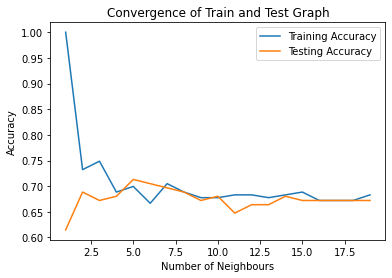

In [82]:
#defining optimal k value

nCount = range(1,20,1)
training_accuracy = []
test_accuracy = []
for i in nCount:
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    training_accuracy.append(metrics.accuracy_score(y_train, neigh.predict(X_train)))
    print("Train set Accuracy: ",training_accuracy)
    test_accuracy.append(metrics.accuracy_score(y_test, y_pred))
    print("Test set Accuracy: ", test_accuracy)

plt.plot(nCount,training_accuracy, label ='Training Accuracy')
plt.plot(nCount, test_accuracy, label ='Testing Accuracy')
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.title('Convergence of Train and Test Graph')
plt.legend()
plt.show()

In [83]:
#apply classifier on dataset with optimal k value

classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)



In [84]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, classifier.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, y_pred))
 

Train set Accuracy:  0.6994535519125683
Test set Accuracy:  0.7131147540983607


Confusion Matrix:
[[79  3  0]
 [28  8  0]
 [ 4  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.96      0.82        82
           1       0.73      0.22      0.34        36
           2       0.00      0.00      0.00         4

    accuracy                           0.71       122
   macro avg       0.48      0.40      0.39       122
weighted avg       0.69      0.71      0.65       122

Accuracy: 0.7131147540983607


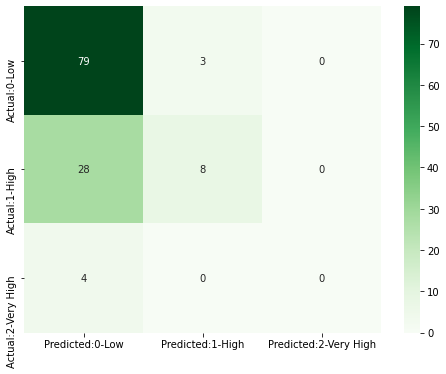

In [85]:
#classification model evaluation 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_matrix)
classification_report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (classification_report)
accuracy_score = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_score)
conf_matrix_pd=pd.DataFrame(data=confusion_matrix,columns=['Predicted:0-Low','Predicted:1-High', 'Predicted:2-Very High'],index=['Actual:0-Low','Actual:1-High', 'Actual:2-Very High'])
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix_pd, annot=True,fmt='d',cmap="Greens")

# KNN Regression

In [86]:
def knn_regression(df, features, target, k=9):
       
    # features and target
    X = df[[features]]
    y = df[target]

    # K-fold validation
    kf = KFold(n_splits=10, shuffle=True, random_state=0)
    knn = KNeighborsRegressor(n_neighbors=k)
    mses = cross_val_score(knn, X, y, cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    
    return np.mean(np.sqrt(np.absolute(mses)))

In [87]:
df = merge_df2
df

,Area name,Cumulative lab-confirmed cases rate,median age,population density,Age 65+%,Asian,Black,Mixed,Other,White,Inflow,Outflow,cr_intensity
0,Adur,301.7,45.7,1531,23.5,1.73,0.51,1.45,0.43,95.88,3887,3527,0
1,Allerdale,398.9,48.3,79,24.7,0.49,0.08,0.44,0.06,98.92,3428,3020,0
2,Amber Valley,359.0,46.1,484,22.2,0.76,0.21,0.80,0.10,98.13,6928,5388,0
3,Arun,212.1,49.7,727,28.9,1.42,0.36,1.00,0.16,97.06,8308,6899,0
4,Ashfield,464.4,41.9,1163,19.4,0.92,0.39,0.89,0.11,97.69,6760,6235,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,Worthing,378.0,45.2,3351,22.6,3.22,0.83,1.75,0.41,93.78,6503,5754,0
301,Wychavon,345.4,48.2,195,25.1,0.97,0.19,0.82,0.14,97.87,7957,6160,0
302,Wyre,584.3,49.9,397,27.8,0.92,0.12,0.62,0.10,98.24,6549,5260,1
303,Wyre Forest,410.7,46.8,519,24.9,1.42,0.22,1.02,0.10,97.24,4224,3892,0


In [88]:
#defining featuers (indicators)

features=['Cumulative lab-confirmed cases rate', 'median age', 'population density', 'Age 65+%', 'Asian','Inflow']

In [89]:
#normalising features

df = (df[features] - df[features].mean()) / df[features].std()
df

,Cumulative lab-confirmed cases rate,median age,population density,Age 65+%,Asian,Inflow
0,-0.815171,0.691878,-0.101739,0.798153,-0.524821,-0.858451
1,-0.300574,1.202354,-0.663396,1.048345,-0.681701,-0.919063
2,-0.511813,0.770413,-0.506736,0.527112,-0.647542,-0.456885
3,-1.289532,1.477226,-0.412739,1.924017,-0.564041,-0.274655
4,0.046197,-0.054202,-0.244087,-0.056669,-0.627299,-0.479070
...,...,...,...,...,...,...
300,-0.411223,0.593710,0.602267,0.610509,-0.336312,-0.513007
301,-0.583814,1.182721,-0.618525,1.131743,-0.620973,-0.321005
302,0.680972,1.516493,-0.540389,1.694674,-0.627299,-0.506932
303,-0.238102,0.907849,-0.493197,1.090044,-0.564041,-0.813950


In [90]:
#selecting only relevant features

indicators=['median age', 'population density', 'Age 65+%', 'Asian', 'Inflow' ]

In [91]:
#appling KNN regression on every feature

for indicator in indicators:
    print(indicator, ':', knn_regression(df, indicator, 'Cumulative lab-confirmed cases rate', k=9))

median age : 0.32519375560704583
population density : 0.41797862757908727
Age 65+% : 0.43284453553270447
Asian : 0.3770771761375053
Inflow : 0.4103644071321149


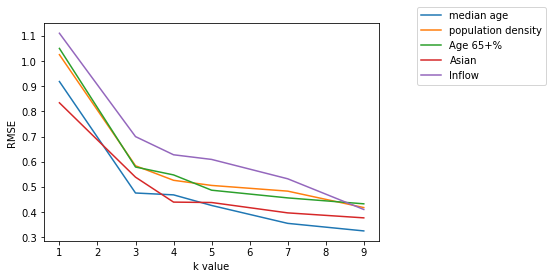

In [92]:
#KNN regression model evaluation with ploting RMSE score graph for every feature

k_values = [1, 3, 4, 5, 7, 9]
feature_k_rmses = dict()
for feature in indicators:
    k_rmses = dict()
    for k in k_values:
        k_rmses[k] = knn_regression(df, feature, 'Cumulative lab-confirmed cases rate', k)
    feature_k_rmses[feature] = k_rmses
    
for feature, k_rmses in feature_k_rmses.items():
    x = sorted(k_rmses.keys())
    y = list(k_rmses.values())
    
    plt.plot(x, y, label=feature)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(bbox_to_anchor=(1.1, 1.1), loc='upper left')
plt.show()

# Feature Selection with Mutual Info Regression

median age            0.042849
population density    0.111939
Age 65+%              0.060831
Asian                 0.109356
Inflow                0.005296
dtype: float64


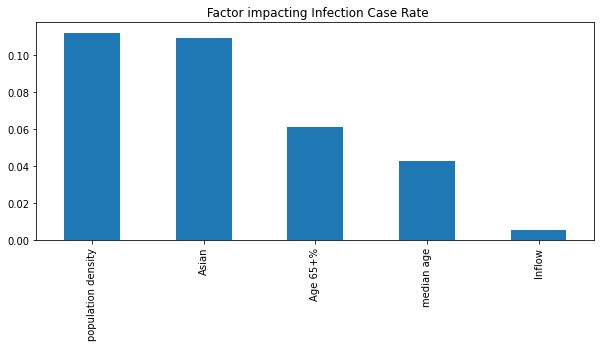

In [93]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
mi = mutual_info_regression(df[indicators], df['Cumulative lab-confirmed cases rate'], n_neighbors=5 )
mi = pd.Series(mi)
mi.index = indicators
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))
plt.title(" Factor impacting Infection Case Rate")
print(mi)

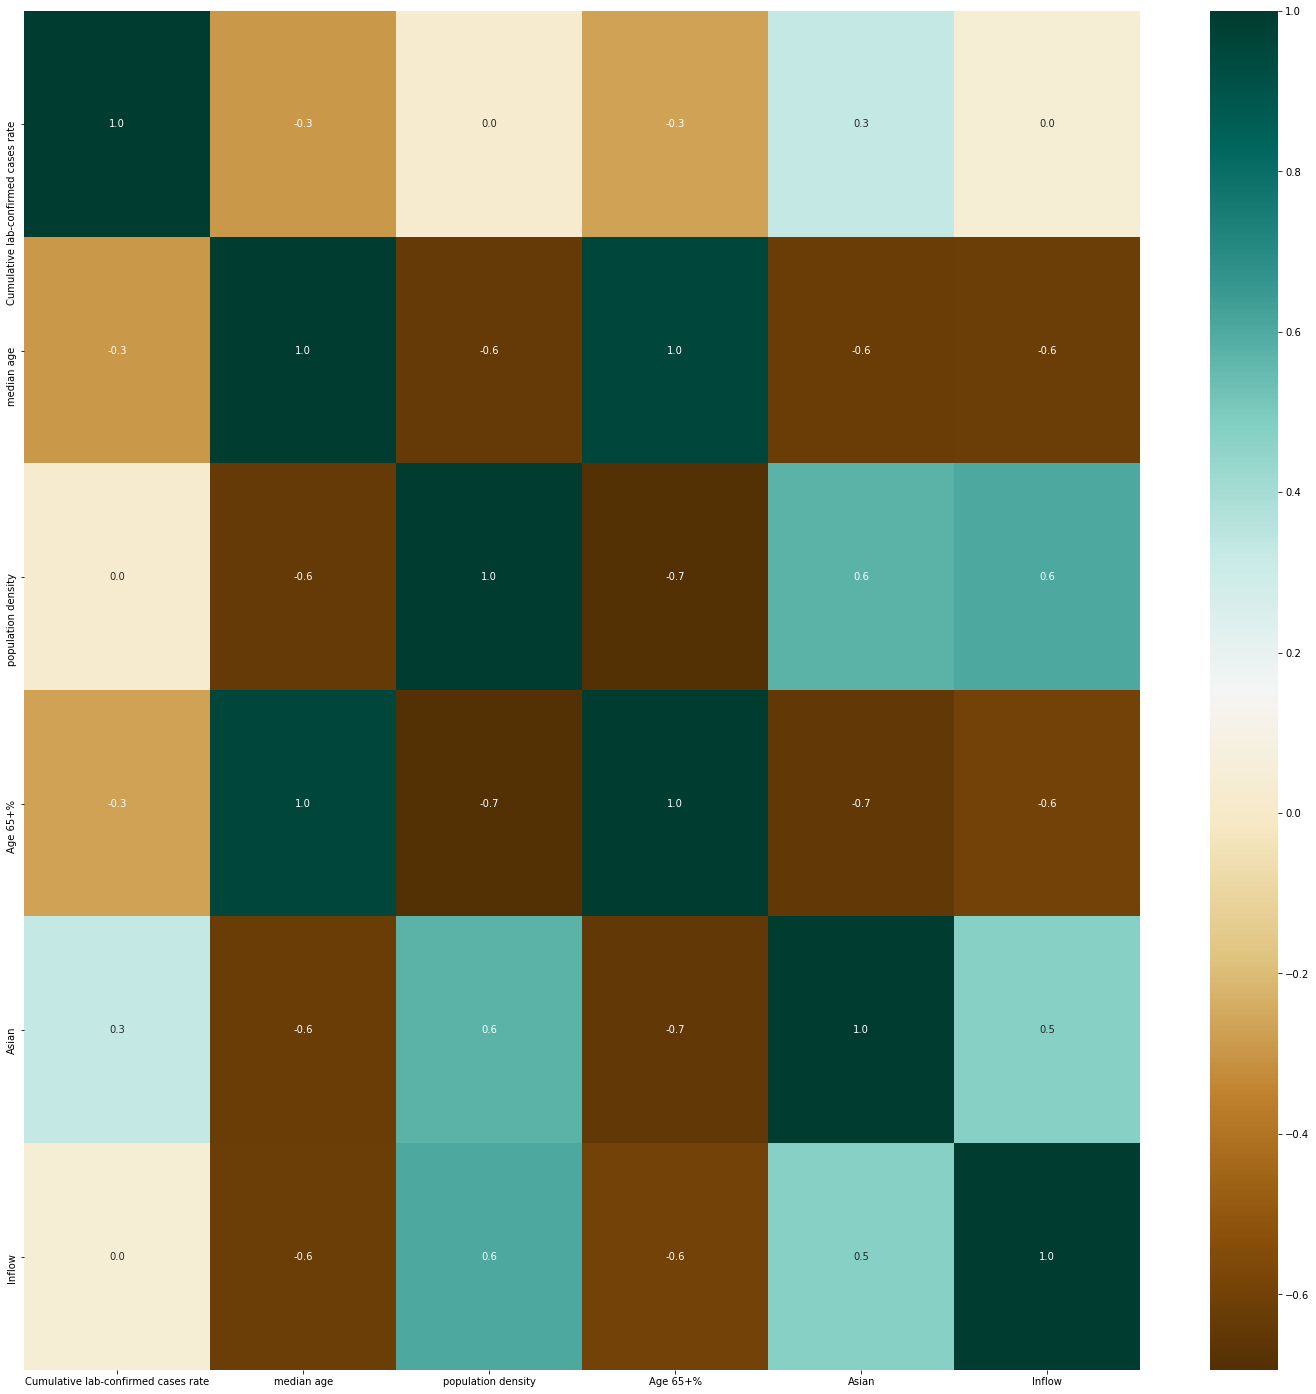

In [94]:
#feature correlation heatmap

corr = df.corr()
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True, fmt= '.1f',ax=ax, cmap="BrBG")
sns.set(font_scale=1.25)
plt.show()